Hamza Mhadi


Sentiment Analysis 

March 2021

In [2]:
 # Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hamza.mhadi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
 # Reading the News API key enviroment variable
api_key = os.getenv("news_api")


In [4]:
 # Create a newsapi client
newsapi = NewsApiClient(api_key="b6aebcb604f047158e475ebb1370a8bf")

In [5]:
# Fetch all the news about Bitcoin
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [6]:
# Fetch all the news about Ethereum
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [7]:
# Create the BTC sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
1,2021-02-12,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
3,2021-03-03,,0.0000,0.000,0.000,0.000
4,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860


In [8]:
# Create the ETH sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856


In [9]:
#Describe the Bitcoing Sentiment 
btc_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.165403,0.061389,0.021200,0.906874
std,0.341385,0.064004,0.051053,0.123657
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.856000
50%,0.070100,0.050000,0.000000,0.928000
75%,0.440400,0.091000,0.000000,1.000000
max,0.851900,0.260000,0.326000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,92.000000,92.000000,92.000000,92.000000
mean,0.193288,0.070250,0.027783,0.901935
std,0.386828,0.065526,0.052053,0.079110
min,-0.910000,0.000000,0.000000,0.667000
25%,0.000000,0.000000,0.000000,0.855000
50%,0.190100,0.066000,0.000000,0.909000
75%,0.534375,0.108500,0.059250,0.960500
max,0.877900,0.256000,0.299000,1.000000


(Q) Which coin had the highest mean positive score? (A): ETH 

(Q) Which coin had the highest compound score? (A): BTC

(Q) Which coin had the highest positive score? (A) ETH

Natural Language Processing 

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [37]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

#Add additional stop words
stop.append("u")
stop.append("hey")

stop = set(stop)

In [38]:
#Set tokenization function
def clean_text(article):
    
    words = word_tokenize(article)
    
    words = list(filter(lambda w:w.lower(), words))
 
    words = list(filter(lambda t:t not in punctuation, words))
    
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    
    token = [lemmatizer.lemmatize(word) for word in words]
    
    return token

In [39]:
# Create a new tokens column for Bitcoin
btc_df['token'] = btc_df['text'].apply(clean_text)

In [40]:
btc_df.head()

,date,text,compound,positive,negative,neutral,token
0,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944,"[Twitter, Square, CEO, Jack, Dorsey, rapper, J..."
1,2021-02-12,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916,"[Bitcoin, first, appeared, digital, thin, air,..."
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, Coinb..."
3,2021-03-03,,0.0000,0.000,0.000,0.000,[]
4,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860,"[Bitcoin, future, morning, hit, all-time, high..."


In [41]:
 # Create a new tokens column for Ethereum
eth_df['token'] = eth_df['text'].apply(clean_text)

In [42]:
eth_df.head()

,date,text,compound,positive,negative,neutral,token
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[Worried, GeForce, RTX, 3060, sold, cryptocurr..."
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[NFTs, latest, cryptocurrency, rage, day, band..."
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[NFTs, non-fungible, token, —, scarce, digital..."
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, Christie, 's, auction, digital, artwor..."
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856,"[Attempting, get, ahead, cryptocurrency, miner..."


NGrams and Frequency Analysis 

In [17]:
from collections import Counter
from nltk import ngrams

In [47]:
#Generate Bitcoin N-grams where N=2
N = 2
grams = ngrams(clean_text(btc_df.text.str.cat()), N)
Counter(grams).most_common(10) #Use token_count to get the top 10 words for Bitcoin

[(('Reuters', 'Staff'), 36),
 (('char', 'Reuters'), 33),
 (('FILE', 'PHOTO'), 25),
 (('Reuters', 'Bitcoin'), 21),
 (('Staff', 'FILE'), 16),
 (('virtual', 'currency'), 16),
 (('illustration', 'taken'), 15),
 (('record', 'high'), 12),
 (('picture', 'illustration'), 10),
 (('currency', 'Bitcoin'), 9)]

In [48]:
#Generate Ethereum N-grams where N=2
N = 2
gram1 = ngrams(clean_text(eth_df.text.str.cat()), N)
Counter(gram1).most_common(10) #Use token_count to get the top 10 words for ETH

[(('char', 'Reuters'), 11),
 (('Reuters', 'Staff'), 11),
 (('record', 'high'), 8),
 (('FILE', 'PHOTO'), 8),
 (('Reuters', 'Bitcoin'), 7),
 (('Staff', 'FILE'), 6),
 (('non-fungible', 'token'), 5),
 (('NEW', 'YORK'), 5),
 (('virtual', 'currency'), 5),
 (('illustration', 'taken'), 5)]

World Clouds

In [49]:
#Initial Imports

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

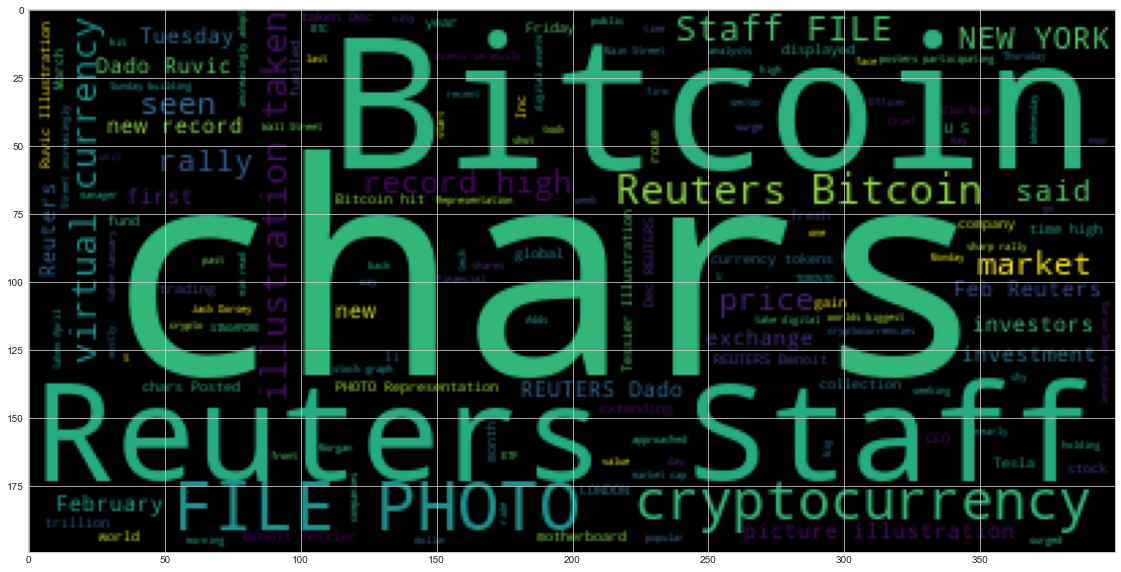

In [50]:
#Generate the Bitcoin word cloud

df_cloud_btc = WordCloud().generate(btc_df.text.str.cat())
plt.imshow(df_cloud_btc)
plt.show()

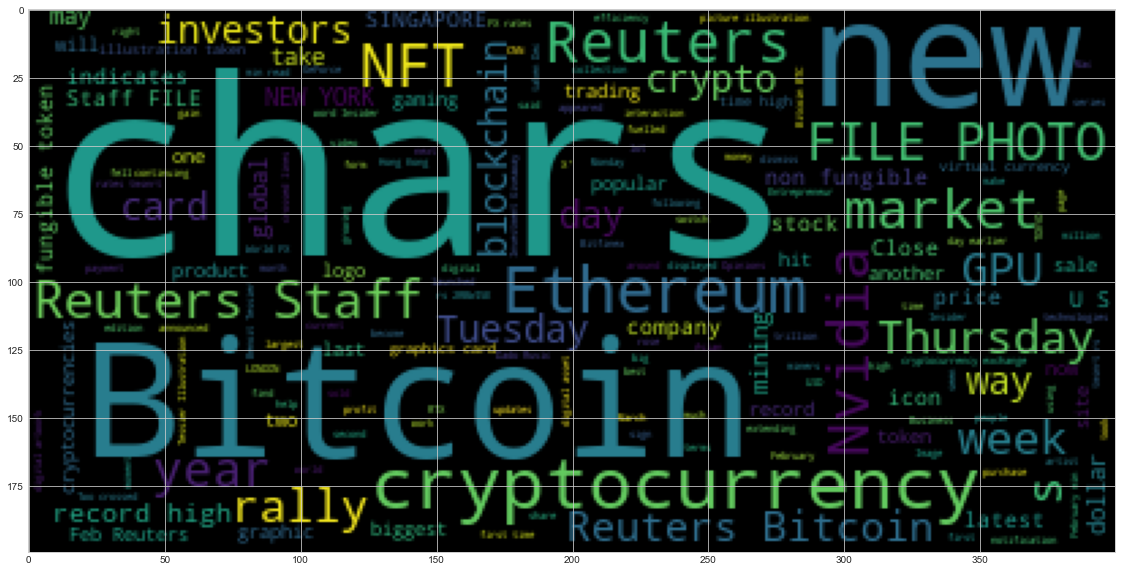

In [51]:
#Generate the Bitcoin word cloud

df_cloud_eth = WordCloud().generate(eth_df.text.str.cat())
plt.imshow(df_cloud_eth)
plt.show()

In [33]:
import spacy
from spacy import displacy

In [52]:
!python -m spacy download en_core_web_sm

  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [53]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc_df.text.str.cat()

In [56]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data['title'] = "Bitcoin NER"

In [57]:
# Render the visualization
displacy.render(doc,style='ent',jupyter=True)

In [58]:
#List all Entities

for ent in doc.ents:
    print(ent.text, ent.label_)

Twitter PRODUCT
Square PERSON
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
first ORDINAL
more than a decade later DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
Francis Suarez PERSON
Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
chars]Blockchain.com ORG
$120 million MONEY
Moore Strategic Ventu PERSON
chars]This morning TIME
Coinbase WORK_OF_ART
American NORP
19, 2021 DATE
Elon Musk PERSON
Binance GPE
Changp GPE
9 CARDINAL
Mastercard PERSON
Wednesday DATE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MON

Ethereum NER

In [59]:
# Concatenate all of the ETH text together
all_eth_text = eth_df.text.str.cat()

In [60]:
# Run the NER processor on all of the text
doc2 = nlp(all_eth_text)

# Add a title to the document
doc2.user_data['title'] = "Ethereum NER"

In [61]:
# Render the visualization
displacy.render(doc2,style='ent',jupyter=True)

In [62]:
#List all Entities

for ent in doc2.ents:
    print(ent.text, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
World FX ORG
Kevin Buckland PERSON
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
